In [1]:
import clusim.clugen as clugen
from clusim.clustering import Clustering
import clusim.sim as sim
from clusim.plotutils import print_clustering

import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except ImportError:
    print("Using basic matplotlib formating.")

In [2]:
# Adjusted Rand Index

c1 = clugen.make_random_clustering(n_elements = 10, n_clusters = 2)
c2 = clugen.make_random_clustering(n_elements = 10, n_clusters = 5)

print_clustering(c1)
print_clustering(c2)

row_format2 ="{:>25}" * (2)
for rdm in sim.available_random_models:
    print(row_format2.format(rdm, str(sim.adjrand_index(c1, c2, random_model = rdm))))

018|2|9346|57
04|816|23|5|7|9
                     perm    -0.017391304347826247
                    perm1    -0.017391304347826247
                      num     0.006995906522757492
                     num1   -0.0020114130741843757
                      all      0.03117742728867589
                     all1     -0.14216072483750178


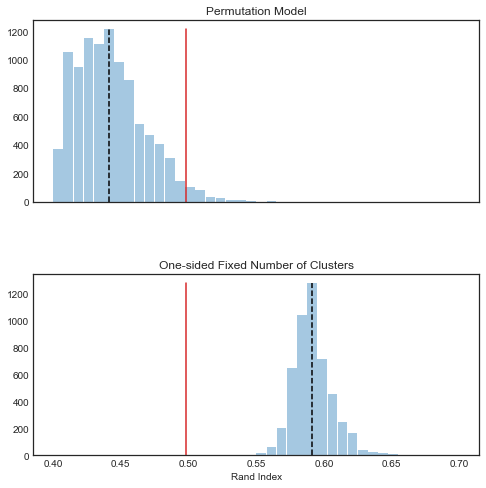

In [3]:
# An example sampling from a random distrubtion of clusterings

ground_truth = Clustering()
ground_truth.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

detected_clustering = Clustering()
detected_clustering.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3, 2, 1])

Nsamples = [100, int(100*99/2)]
model_list = ['perm', 'num1']
true_value = sim.rand_index(detected_clustering, ground_truth)

fig, ax = plt.subplots(2,1, sharex = True, figsize = (8,8), gridspec_kw={'hspace':0.4})
bins = np.linspace(0.4, 0.7, 41)

titles = ['Permutation Model', 'One-sided Fixed Number of Clusters']
for iax in range(2):
    pairwise_comparisons = sim.sample_expected_sim(detected_clustering, ground_truth, measure = 'rand_index', 
                                                       random_model = model_list[iax], 
                                                      nsamples = Nsamples[iax], keep_samples = True)

    rand_dist, bins = np.histogram(pairwise_comparisons, bins = bins)

    ax[iax].bar(0.5*(bins[:-1] + bins[1:]), rand_dist, width = 0.95*np.abs(bins[:-1] - bins[1:]), alpha = 0.4)
    
    exp_value = sim.expected_rand_index(ground_truth.n_elements, random_model = model_list[iax], 
                                         n_clusters1 = detected_clustering.n_clusters, 
                                         n_clusters2 = ground_truth.n_clusters, 
                                         clu_size_seq1 = detected_clustering.clu_size_seq, 
                                         clu_size_seq2 = ground_truth.clu_size_seq)
    
    ax[iax].plot([exp_value,exp_value], [0, rand_dist.max()], c = 'k', ls = '--')

    ax[iax].plot([true_value,true_value], [0, rand_dist.max()], c = sns.color_palette()[3])
    ax[iax].set_title(titles[iax])
    
ax[1].set_xlabel('Rand Index')
plt.show()